# Appendix
### Finance and the Unexpected
Saranya Anantapantula &
Jessica Wachter

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import random
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

## Return Distribution for a Single Stock (Figure 3)

This figure simulates daily returns for a single stock using a jump-diffusion process with these parameters:
- Mean = 0.04
- Volatility = 0.0324
- Jump intensity = 0.33
- Jump mean = 0.12
- Jump volatility = 0.0064

The histogram below shows the simulated density of gross returns.

In [3]:
# set seed to 3 for reproducibility 
np.random.seed(3)

# parameters
N = 500_000
mu = 0.04
sigma = 0.0324  
omega = 0.33
theta = 0.12
delta = 0.0064

def single_stock_returns (N, mu, sigma, omega, theta, delta):
    # w_t: the continuous part, smooth day-to-day prices
    w = np.random.normal(loc=mu, scale=sigma, size=N)

    # z: the jumps, or the suddent spikes/crashes
    # the number of jumps
    p_fail = 1 - omega 
    j = np.random.geometric(p=p_fail, size=N) - 1 #subtract one to get the number of jumps it was successful

    # scale of the jumps
    z_t = np.random.normal(loc = theta, scale = delta, size = N )
    z = j * z_t
    
    # convert log normal returns into gross returns
    return np.exp(w+z)

returns = single_stock_returns (N, mu, sigma, omega, theta, delta)

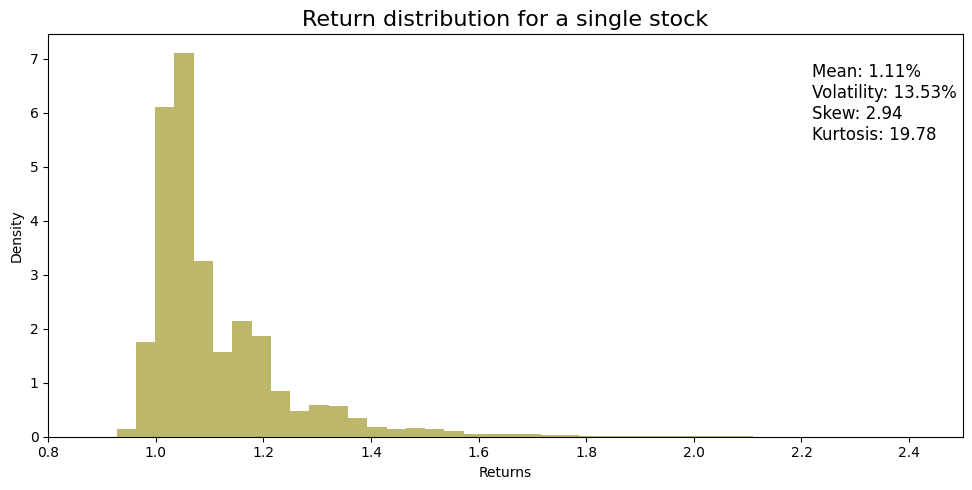

In [14]:
# plot!
plt.figure(figsize=(10, 5))
plt.hist(returns, bins=100, color='darkkhaki', density=True)
plt.title("Return distribution for a single stock", fontsize=16)
plt.xlabel("Returns")
plt.ylabel("Density")

# stats
mean = returns.mean()
vol = returns.std() * 100
skewness = skew(returns)
kurt = kurtosis(returns, fisher=False)

stats_text = (
    f"Mean: {mean:.2f}%\n"
    f"Volatility: {vol:.2f}%\n" 
    f"Skew: {skewness:.2f}\n"
    f"Kurtosis: {kurt:.2f}"
)
plt.text(2.22, 5.5, stats_text, fontsize=12)

plt.xlim(0.8, 2.5)

plt.tight_layout()
plt.show()


## Return Distribution for a Single Small-Cap Stock (Figure 4)

This figure uses actual WRDS data for a small-cap, pharmaceutical stock (Sarepta Therapeutics) to plot its return distribution.

Query Details:
- CRSP > Monthly Update > Legacy Data - Stock/Security Files > Daily Stock File
- All possible dates
- Ticker: SRPT 

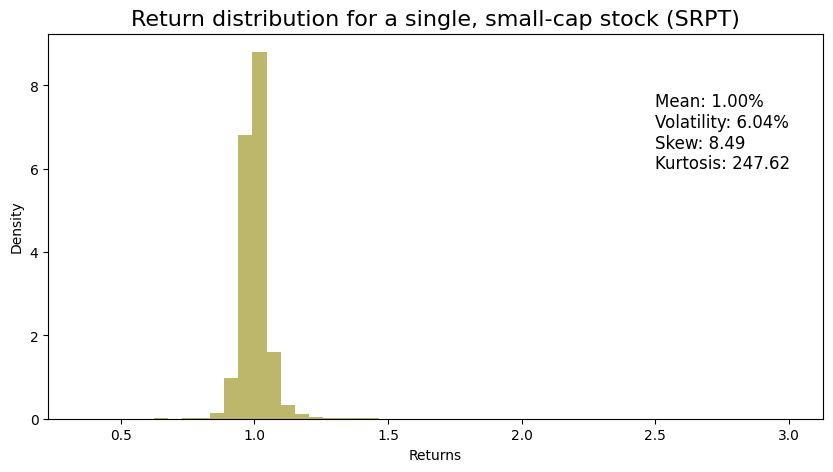

In [44]:
df = pd.read_csv("./data/fig4_SRPT.csv")

# convert returns to a numeric column
df["RET"] = pd.to_numeric(df["RET"], errors="coerce")
df = df.dropna(subset = "RET")
df["GRET"] = df["RET"] + 1 #gross returns

g_returns = df["GRET"]

mean = np.mean(g_returns)
vol = np.std(g_returns)
skewness = skew(g_returns)
kurt = kurtosis(g_returns, fisher=False) 

plt.figure(figsize=(10, 5))
plt.hist(g_returns, bins=50, color="darkkhaki", density=True)
plt.title("Return distribution for a single, small-cap stock (SRPT)", fontsize=16)
plt.xlabel("Returns")
plt.ylabel("Density")

stats_text = (
    f"Mean: {mean:.2f}%\n"
    f"Volatility: {vol*100:.2f}%\n"
    f"Skew: {skewness:.2f}\n"
    f"Kurtosis: {kurt:.2f}"
)
plt.text(2.5, 6, stats_text, fontsize=12)

plt.show()

## Return Distribution for a Single Large Stock (Figure 5)

This figure uses WRDS data for Apple Inc. to show the distribution of daily gross returns.

Query Details:
- CRSP > Monthly Update > Legacy Data - Stock/Security Files > Daily Stock File
- All possible dates
- Ticker: AAPL 

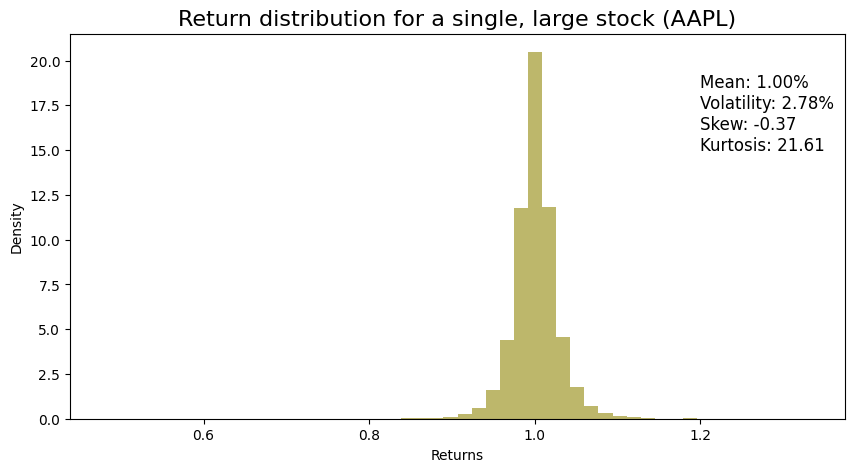

In [45]:
df = pd.read_csv("./data/fig5_AAPL.csv")

# convert returns to a numeric column
df["RET"] = pd.to_numeric(df["RET"], errors="coerce")
df = df.dropna(subset = "RET")
df["GRET"] = df["RET"] + 1 #gross returns

g_returns = df["GRET"]

mean = np.mean(g_returns)
vol = np.std(g_returns)
skewness = skew(g_returns)
kurt = kurtosis(g_returns, fisher=False)

plt.figure(figsize=(10, 5))
plt.hist(g_returns, bins=50, color="darkkhaki", density=True)
plt.title("Return distribution for a single, large stock (AAPL)", fontsize=16)
plt.xlabel("Returns")
plt.ylabel("Density")

stats_text = (
    f"Mean: {mean:.2f}%\n"
    f"Volatility: {vol*100:.2f}%\n"
    f"Skew: {skewness:.2f}\n"
    f"Kurtosis: {kurt:.2f}"
)
plt.text(1.2, 15, stats_text, fontsize=12)

plt.show()

## Return Distribution for a Portfolio of 100 Stocks (Figure 6)

This figure simulates a portfolio by averaging returns from 100 independent stocks (i.i.d. draws from the same distribution).

In [46]:
copies = 100

# 100 copies from previous single stock simulation
returns_matrix = np.vstack([single_stock_returns(N, mu, sigma, omega, theta, delta) for _ in range(copies)]) # matrix of (m,N), so (100, 500K)

# each day, portfolio_returns are the average of the returns of the 100 stocks for that day
portfolio_returns = returns_matrix.mean(axis=0)

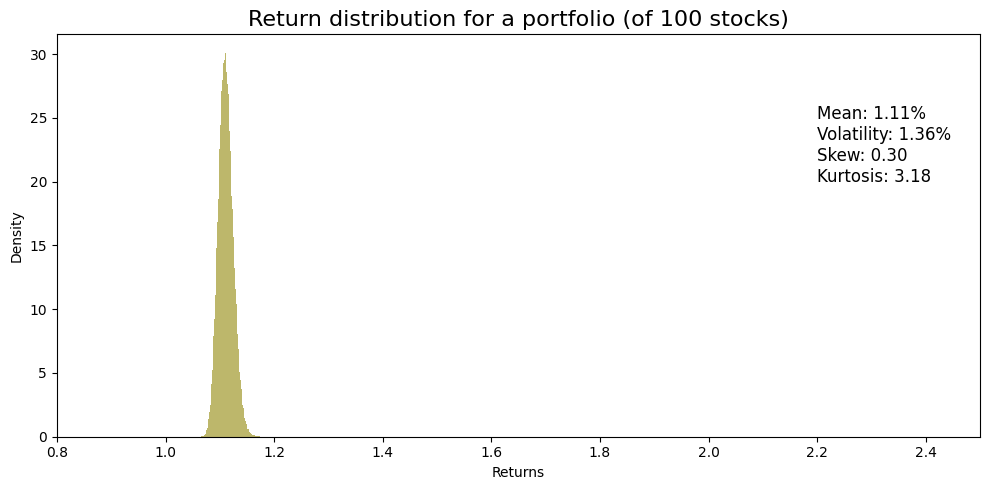

In [47]:
# plot!
plt.figure(figsize=(10, 5))
plt.hist(portfolio_returns, bins=100, color='darkkhaki', density=True)
plt.title("Return distribution for a portfolio (of 100 stocks)", fontsize=16)
plt.xlabel("Returns")
plt.ylabel("Density")

# stats
mean = portfolio_returns.mean()
vol = portfolio_returns.std() * 100
skewness = skew(portfolio_returns)
kurt = kurtosis(portfolio_returns, fisher=False)

stats_text = (
    f"Mean: {mean:.2f}%\n"
    f"Volatility: {vol:.2f}%\n" 
    f"Skew: {skewness:.2f}\n"
    f"Kurtosis: {kurt:.2f}"
)
plt.text(2.2, 20, stats_text, fontsize=12)

plt.xlim(0.8, 2.5)
plt.tight_layout()
plt.show()


## Daily Returns on the Market Portfolio (Figure 8)

This figure uses CRSP index data to plot the distribution of daily returns for the market portfolio. 

Query Details: 
- CRSP > Annual Update > Index - Version 2 (CIZ) > CRSP Daily Stock File Indexes
- Dates: 1988-06-01 to 2022-12-31
- Index Code: 1000080

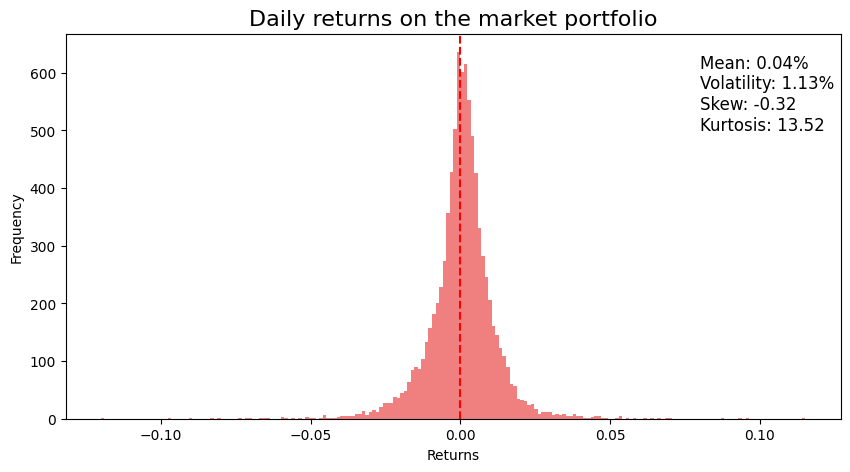

In [48]:
df = pd.read_csv("./data/fig8_MarketReturns.csv")

# convert returns to numeric col 
df["COL1"] = pd.to_numeric(df["COL1"], errors = "coerce")
df = df.dropna(subset = "COL1")
df["returns"] = df["COL1"]
returns = df["returns"]


mean = np.mean(returns)
vol = np.std(returns)
skw = skew(returns)
kurt = kurtosis(returns, fisher=False)

plt.figure(figsize=(10, 5))
plt.hist(returns, bins=200, color='lightcoral', density=False)
plt.axvline(x=0, color='red', linestyle='dashed')

stats_text = (
    f"Mean: {mean*100:.2f}%\n"
    f"Volatility: {vol*100:.2f}%\n"
    f"Skew: {skw:.2f}\n"
    f"Kurtosis: {kurt:.2f}"
)

plt.text(0.08, 500, stats_text, fontsize=12)

plt.title("Daily returns on the market portfolio", fontsize=16)
plt.xlabel("Returns")
plt.ylabel("Frequency")

plt.show()


## Sampling Distribution for Kurtosis (Figure 9)

This figure is the distribution of kurtosis from a Monte Carlo simulation:
- Generate a population of market-like returns using these parameters:
    - Mean = 0.023
    - Volatility = 0.01
    - Jump intensity = 0.01
    - Jump mean = -0.3
    - Jump volatility = 0.15

- Draw repeated samples (size = 50) without replacement.
- Compute kurtosis for each sample.

In [49]:
# fix seed
np.random.seed(3)

# parameters
N = 500_000
mu = 0.023
sigma = 0.01
omega= 0.01
theta = -0.3
delta = 0.15

# calculate market returns 
market_returns = single_stock_returns(N, mu, sigma, omega, theta, delta)
# find the the population kurtosis for these returns
pop_kurt = kurtosis(market_returns, fisher=False) 

# Monte carlo sampling
iter = 10_000
sample_size = 50

sample_kurt = np.empty(iter) # empty list for each sample's kurtosis

# for each iter, pick 50 distinct market returns (w/o replacement so each of the 50 market returns is distinct)
for i in range(iter):
    sample = np.random.choice(market_returns, size=sample_size, replace=False)
    sample_kurt[i] = kurtosis(sample, fisher=False)

mean_sample_kurt = sample_kurt.mean()

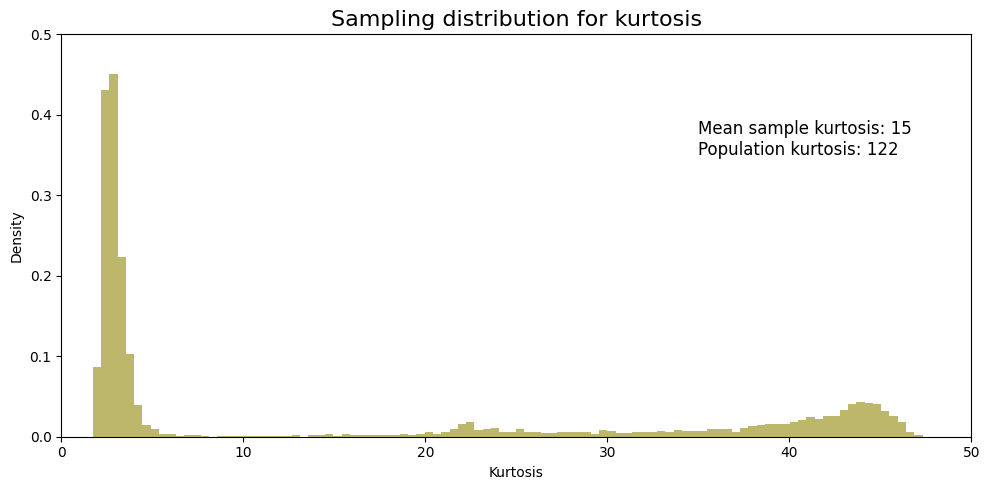

In [55]:
# plot!
plt.figure(figsize=(10, 5))
plt.hist(sample_kurt, bins=100, color="darkkhaki", density=True)
plt.title("Sampling distribution for kurtosis", fontsize=16)
plt.xlabel("Kurtosis")
plt.ylabel("Density")

stats_text = (
    f"Mean sample kurtosis: {mean_sample_kurt:.0f}\n"
    f"Population kurtosis: {pop_kurt:.0f}"
)

plt.text(35, 0.35, stats_text, fontsize=12)

plt.xlim(0, 50)
plt.ylim(0.0,0.5)
plt.tight_layout()
plt.show()


## Distribution of Returns: Put-Write Index vs Market Portfolio (Figure 13)

This figure compares market portfolio daily returns (data from Figure 8) to CBOE PutWrite index daily returns (data from CBOE). 

In [51]:
# load both datasets
market = pd.read_csv("./data/fig8_MarketReturns.csv")
cboe = pd.read_csv("./data/fig13_PutWriteReturns.csv")

# ensure data is in the same timeframe (from 2007/01/03 to 2022/12/31)
market["DlyCalDt"] = pd.to_datetime(market["DlyCalDt"], format="%Y%m%d")
start_date = datetime(2007, 1, 3)
market = market[market["DlyCalDt"] >= start_date]

cboe["DATE"] = pd.to_datetime(cboe["DATE"])
end_date = datetime(2022, 12, 31)
cboe = cboe[cboe["DATE"] <= end_date]

# convert returns into numeric 
market["COL1"] = pd.to_numeric(market["COL1"], errors = "coerce")
market = market.dropna(subset = "COL1")
market_returns = market["COL1"]

cboe["return"] = pd.to_numeric(cboe["return"], errors = "coerce")
cboe = cboe.dropna(subset = "return")
putwrite_returns = cboe["return"]

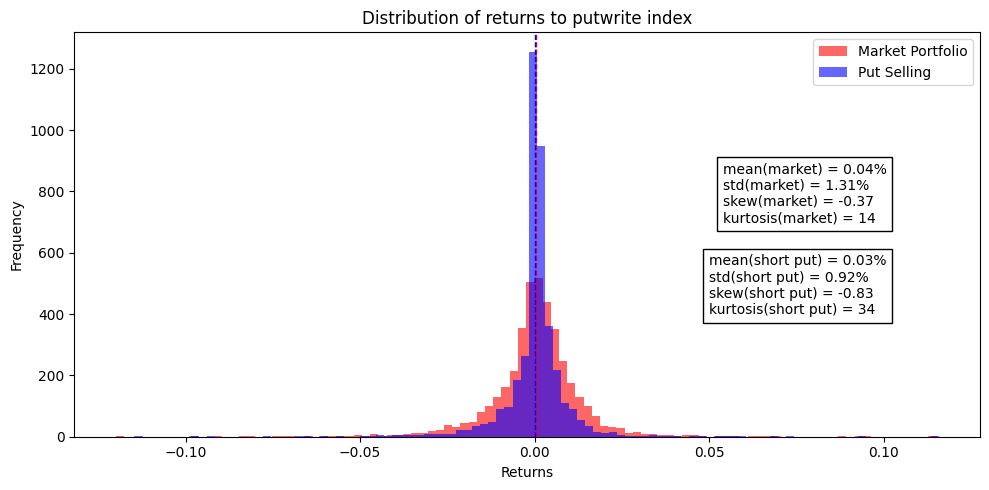

In [52]:
#plot! 
plt.figure(figsize=(10, 5))
plt.hist(market_returns, bins=100, alpha=0.6, color='red', label="Market Portfolio")
plt.hist(putwrite_returns, bins=100, alpha=0.6, color='blue', label="Put Selling")
plt.axvline(market_returns.mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(putwrite_returns.mean(), color='blue', linestyle='dashed', linewidth=1)

plt.title("Distribution of returns to putwrite index")
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.legend()

market_stats = (
    f"mean(market) = {np.mean(market_returns)*100:.2f}%\n"
    f"std(market) = {np.std(market_returns)*100:.2f}%\n"
    f"skew(market) = {skew(market_returns):.2f}\n"
    f"kurtosis(market) = {kurtosis(market_returns, fisher=False):.0f}"
)

put_stats = (
    f"mean(short put) = {np.mean(putwrite_returns)*100:.2f}%\n"
    f"std(short put) = {np.std(putwrite_returns)*100:.2f}%\n"
    f"skew(short put) = {skew(putwrite_returns):.2f}\n"
    f"kurtosis(short put) = {kurtosis(putwrite_returns, fisher=False):.0f}"
)

plt.text(0.054, 700, market_stats, fontsize=10, bbox=dict(facecolor="white", edgecolor="black"))
plt.text(0.05, 400, put_stats, fontsize=10, bbox=dict(facecolor="white", edgecolor="black"))

plt.tight_layout()  
plt.show()



## Outlier Returns: Put-Write Index vs Market Portfolio (Figure 14)

This figure focuses on the outliers of the previous comparison:
- Filters days where |return| > 3% (threshold = 0.03).

In [53]:
# outlier threshold = 0.03 
threshold = 0.03
market_mask = np.abs(market_returns) > threshold
putwrite_mask = np.abs(putwrite_returns) > threshold

market_outliers = market_returns[market_mask]
putwrite_outliers = putwrite_returns[putwrite_mask]

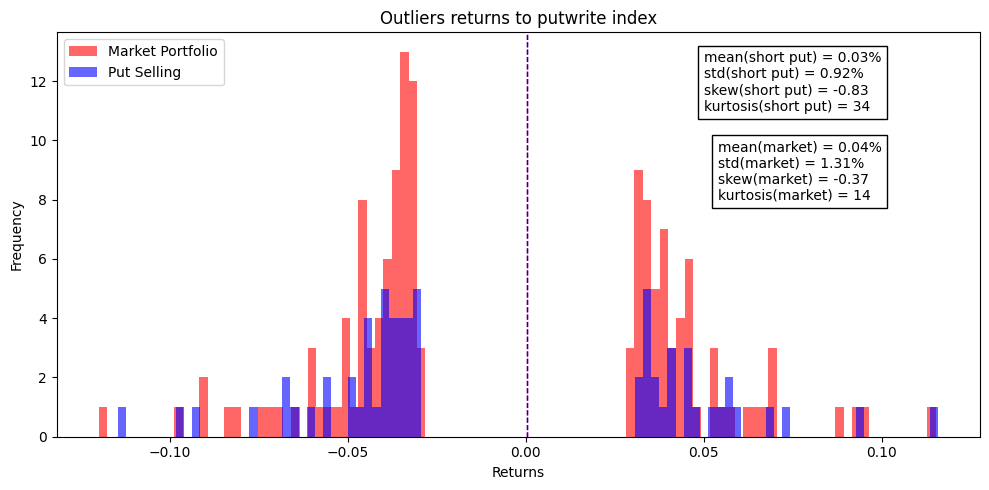

In [54]:
#plot! 
plt.figure(figsize=(10, 5))
plt.hist(market_outliers, bins=100, alpha=0.6, color='red', label="Market Portfolio")
plt.hist(putwrite_outliers, bins=100, alpha=0.6, color='blue', label="Put Selling")
plt.axvline(market_returns.mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(putwrite_returns.mean(), color='blue', linestyle='dashed', linewidth=1)

plt.title("Outliers returns to putwrite index")
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.legend()

market_stats = (
    f"mean(market) = {np.mean(market_returns)*100:.2f}%\n"
    f"std(market) = {np.std(market_returns)*100:.2f}%\n"
    f"skew(market) = {skew(market_returns):.2f}\n"
    f"kurtosis(market) = {kurtosis(market_returns, fisher=False):.0f}"
)

put_stats = (
    f"mean(short put) = {np.mean(putwrite_returns)*100:.2f}%\n"
    f"std(short put) = {np.std(putwrite_returns)*100:.2f}%\n"
    f"skew(short put) = {skew(putwrite_returns):.2f}\n"
    f"kurtosis(short put) = {kurtosis(putwrite_returns, fisher=False):.0f}"
)

plt.text(0.054, 8, market_stats, fontsize=10, bbox=dict(facecolor="white", edgecolor="black"))
plt.text(0.05, 11, put_stats, fontsize=10, bbox=dict(facecolor="white", edgecolor="black"))

plt.tight_layout()
plt.show()

